In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("/content/mydrive/MyDrive/Colab Notebooks/Deep_Learning/insurance_data.csv")

In [ ]:
data.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['age', 'affordibility']], data['bought_insurance'], test_size=0.2, random_state= 100)

In [ ]:
len(X_train)

22

In [ ]:
len(X_test)

6

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [ ]:
# scale down the age column
X_train_scalled = X_train.copy()
X_train_scalled['age'] = X_train_scalled['age']/100

X_test_scalled = X_test.copy()
X_test_scalled['age'] = X_test_scalled['age']/100

In [ ]:
X_train_scalled

,age,affordibility
25,0.54,1
22,0.40,1
6,0.55,0
13,0.29,0
20,0.21,1
4,0.46,1
27,0.46,1
0,0.22,1
1,0.25,0
17,0.58,1


In [ ]:
# building the model
model = keras.Sequential([
    keras.layers.Dense(1, input_shape = (2,), activation = 'sigmoid', kernel_initializer = 'ones', bias_initializer = 'zeros')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_scalled, y_train, epochs = 5000)

Streaming output truncated to the last 5000 lines.
Epoch 2104/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.5399 - accuracy: 0.6818
Epoch 2105/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.5399 - accuracy: 0.6818
Epoch 2106/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.5399 - accuracy: 0.6818
Epoch 2107/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.5398 - accuracy: 0.6818
Epoch 2108/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.5398 - accuracy: 0.6818
Epoch 2109/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.5397 - accuracy: 0.6818
Epoch 2110/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.5397 - accuracy: 0.6818
Epoch 2111/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.5397 - accuracy: 0.6818
Epoch 2112/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.5396 - accuracy: 0.6818
Epoch 2113/5000
1/1 [==========

In [ ]:
model.evaluate(X_test_scalled, y_test)

1/1 [==============================] - 0s 252ms/step - loss: 0.3365 - accuracy: 0.8333


[0.33646634221076965, 0.8333333134651184]

In [ ]:
y_pred = model.predict(X_test_scalled)

1/1 [==============================] - 0s 123ms/step


In [ ]:
y_pred

array([[0.85744447],
       [0.4361822 ],
       [0.17532319],
       [0.18326381],
       [0.82118106],
       [0.5032958 ]], dtype=float32)

In [ ]:
y_test

9     1
26    0
21    0
12    0
5     1
11    0
Name: bought_insurance, dtype: int64

In [ ]:
y_pred_int = []
for i in y_pred:
  if i >= 0.5:
    y_pred_int.append(1)
  else:
    y_pred_int.append(0)

In [ ]:
y_pred_int

[1, 0, 0, 0, 1, 1]

In [ ]:
from tensorflow.math import confusion_matrix
cm = confusion_matrix(labels = y_test, predictions = y_pred_int)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[3, 1],
       [0, 2]], dtype=int32)>

Text(24.0, 0.5, 'True')

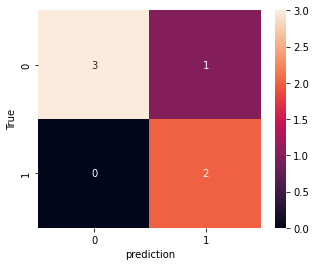

In [ ]:
import seaborn as sbn
plt.figure(figsize=(5,4))
sbn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("prediction")
plt.ylabel("True")

In [ ]:
#get the weights and bais
weights, bais = model.get_weights()

In [ ]:
print("weights")
print(weights)
print("Bais")
print(bais)

weights
[[5.3970947]
 [1.453602 ]]
Bais
[-2.951605]


###So, the prediction function is -

y = 5.3970942*x1 + 1.453602*x2 -2.9516048

---



In [ ]:
import math
def sigmoid(x):
  return 1/(1 + math.exp(-x))

In [ ]:
def prediction_fun(age, affordibility):
  weighted_sum = weights[0]*age + weights[1]*affordibility + bais
  # print(weighted_sum)
  return sigmoid(weighted_sum)

In [ ]:
X_test_scalled

,age,affordibility
9,0.61,1
26,0.23,1
21,0.26,0
12,0.27,0
5,0.56,1
11,0.28,1


In [ ]:
prediction_fun(0.61,1)

0.857444432076148

In [ ]:
#implementing neuron from scrach
def loss_function(y_true, y_pred):
  epsilon = 1e-15
  y_pred_new = [max(i, epsilon) for i in y_pred]
  y_pred_new = [min(i, 1-epsilon) for i in y_pred]
  y_pred_new = np.array(y_pred_new)
  return -np.mean(y_true*np.log(y_pred_new) + (1-y_true)*np.log(1-y_pred_new))

In [ ]:
def sigmoid_numpy(x):
  return 1/(1+np.exp(-x))

In [67]:
def gradient_descent(age, affordibility, y_true, epoch, loss_threshold):
  # initialise w1, w2, bias
  w1 = w2 = 1
  bias = 0
  learning_rate = 0.5
  n = len(age)

  for i in range(epoch):
    weighted_sum = w1*age + w2*affordibility + bias
    y_predicted = sigmoid_numpy(weighted_sum)
    total_error = loss_function(y_true, y_predicted)
    # adjust the parameters
    # w1 = w1 - learning_rate*np.mean(np.dot(age,(y_predicted - y_true)))
    # w2 = w2 - learning_rate*np.mean(np.dot(affordibility,(y_predicted - y_true)))
    # bias = bias - learning_rate*np.mean(y_predicted - y_true)
    w1 = w1 - learning_rate*(1/n)*(np.dot(np.transpose(age),(y_predicted - y_true)))
    w2 = w2 - learning_rate*(1/n)*(np.dot(np.transpose(affordibility),(y_predicted - y_true)))
    bias = bias - learning_rate*np.mean(y_predicted - y_true)

    print("Epoch : ", i, "\tw1 : \t", w1, "\tw2 : \t", w2, "\tbias : \t", bias)

    if total_error <= loss_threshold:
      break
  
  return w1, w2, bias


In [68]:
gradient_descent(X_train_scalled['age'],X_train_scalled['affordibility'], y_train, 1000, 0.4631)

Epoch :  0 	w1 : 	 0.9811382085705194 	w2 : 	 0.9530319541416706 	bias : 	 -0.09584637350369292
Epoch :  1 	w1 : 	 0.9672377472977554 	w2 : 	 0.9144761805508385 	bias : 	 -0.17931809975067697
Epoch :  2 	w1 : 	 0.9578299938222498 	w2 : 	 0.883634677929156 	bias : 	 -0.2516148926872196
Epoch :  3 	w1 : 	 0.9523875592582877 	w2 : 	 0.8596569916492832 	bias : 	 -0.31406546087206677
Epoch :  4 	w1 : 	 0.9503722037258828 	w2 : 	 0.8416363271270622 	bias : 	 -0.3680121010733936
Epoch :  5 	w1 : 	 0.9512695274812458 	w2 : 	 0.8286824080492071 	bias : 	 -0.41472864618397093
Epoch :  6 	w1 : 	 0.9546101024311072 	w2 : 	 0.819968404014857 	bias : 	 -0.4553716477248744
Epoch :  7 	w1 : 	 0.9599795263762667 	w2 : 	 0.814755741505684 	bias : 	 -0.49095822676510664
Epoch :  8 	w1 : 	 0.9670206988083615 	w2 : 	 0.8124028643888601 	bias : 	 -0.5223623678871439
Epoch :  9 	w1 : 	 0.9754312953701464 	w2 : 	 0.8123637281832631 	bias : 	 -0.5503224059209904
Epoch :  10 	w1 : 	 0.9849586847729365 	w2 : 	 0

(5.367485981094983, 1.4742664273290214, -2.964662209218192)

In [69]:
print(weights)

[[5.3970947]
 [1.453602 ]]


In [70]:
print(bais)

[-2.951605]


In [73]:
class myNeuralNetwork():
  
  def __init__(self):
    self.w1 = 1
    self.w2 = 1
    self.bias = 0

  def predict(self,X_test):
    weighted_sum = self.w1*X_test['age'] + self.w2*X_test['affordibility'] + self.bias
    return sigmoid_numpy(weighted_sum)

  def fit(self, X_train, y_train, epoch, loss_threshold):
    self.w1, self.w2, self.bias = gradient_descent( X_train['age'], X_train['affordibility'], y_train, epoch, loss_threshold)

  def gradient_descent(self, age, affordibility, y_true, epoch, loss_threshold):
    # initialise w1, w2, bias
    w1 = w2 = 1
    bias = 0
    learning_rate = 0.5
    n = len(age)

    for i in range(epoch):
      weighted_sum = w1*age + w2*affordibility + bias
      y_predicted = sigmoid_numpy(weighted_sum)
      total_error = loss_function(y_true, y_predicted)
      # adjust the parameters
      # w1 = w1 - learning_rate*np.mean(np.dot(age,(y_predicted - y_true)))
      # w2 = w2 - learning_rate*np.mean(np.dot(affordibility,(y_predicted - y_true)))
      # bias = bias - learning_rate*np.mean(y_predicted - y_true)
      w1 = w1 - learning_rate*(1/n)*(np.dot(np.transpose(age),(y_predicted - y_true)))
      w2 = w2 - learning_rate*(1/n)*(np.dot(np.transpose(affordibility),(y_predicted - y_true)))
      bias = bias - learning_rate*np.mean(y_predicted - y_true)

      print("Epoch : ", i, "\tw1 : \t", w1, "\tw2 : \t", w2, "\tbias : \t", bias)

      if total_error <= loss_threshold:
        break
    
    return w1, w2, bias
  

In [77]:
my_custom_NN = myNeuralNetwork()
my_custom_NN.fit(X_train_scalled, y_train, 1000, 0.4631)


Epoch :  0 	w1 : 	 0.9811382085705194 	w2 : 	 0.9530319541416706 	bias : 	 -0.09584637350369292
Epoch :  1 	w1 : 	 0.9672377472977554 	w2 : 	 0.9144761805508385 	bias : 	 -0.17931809975067697
Epoch :  2 	w1 : 	 0.9578299938222498 	w2 : 	 0.883634677929156 	bias : 	 -0.2516148926872196
Epoch :  3 	w1 : 	 0.9523875592582877 	w2 : 	 0.8596569916492832 	bias : 	 -0.31406546087206677
Epoch :  4 	w1 : 	 0.9503722037258828 	w2 : 	 0.8416363271270622 	bias : 	 -0.3680121010733936
Epoch :  5 	w1 : 	 0.9512695274812458 	w2 : 	 0.8286824080492071 	bias : 	 -0.41472864618397093
Epoch :  6 	w1 : 	 0.9546101024311072 	w2 : 	 0.819968404014857 	bias : 	 -0.4553716477248744
Epoch :  7 	w1 : 	 0.9599795263762667 	w2 : 	 0.814755741505684 	bias : 	 -0.49095822676510664
Epoch :  8 	w1 : 	 0.9670206988083615 	w2 : 	 0.8124028643888601 	bias : 	 -0.5223623678871439
Epoch :  9 	w1 : 	 0.9754312953701464 	w2 : 	 0.8123637281832631 	bias : 	 -0.5503224059209904
Epoch :  10 	w1 : 	 0.9849586847729365 	w2 : 	 0

In [78]:
my_custom_NN.predict(X_test_scalled)

9     0.856162
26    0.436378
21    0.172342
12    0.180134
5     0.819860
11    0.503125
dtype: float64

In [79]:
y_test

9     1
26    0
21    0
12    0
5     1
11    0
Name: bought_insurance, dtype: int64

In [81]:
print(weights)
print(bais)

[[5.3970947]
 [1.453602 ]]
[-2.951605]
